In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=5

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=5


In [2]:
import pandas as pd
import numpy as np
import json
import logging
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score,precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import ast
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
# Import the file with results
results = pd.read_csv("/home/tajak/Genre-Datasets-Comparison/Creation-of-classifiers-and-cross-prediction/data-splits/X-GENRE-train.csv", sep = "\t", index_col = 0)

results

,text,labels
0,"Seeking All Things Brilliant ""I want people to...",Other
1,Meet Orchid du Bois I first met Hayley Mowday ...,Other
2,Abstract Objective: Reporting bias due to soci...,Information/Explanation
3,In 2009 the song was the focus of a successful...,Information/Explanation
4,QuotW This was the week when neither rumours o...,News
...,...,...
1767,Sound Pillow represents another way in which t...,Promotion
1768,Night vision scopes have been a quite signific...,Instruction
1769,Personal stories - Leigh I was diagnosed over ...,Opinion/Argumentation
1770,"A few days ago , in a galaxy far , far away .....",Prose/Lyrical


In [4]:
results.labels.value_counts(normalize=True)

News                       0.194131
Information/Explanation    0.172686
Promotion                  0.161964
Opinion/Argumentation      0.136569
Instruction                0.118510
Forum                      0.079007
Prose/Lyrical              0.061512
Other                      0.039503
Legal                      0.036117
Name: labels, dtype: float64

In [3]:
# Import the file with results
results = pd.read_csv("results/X-GENRE-Experiments-Results.csv", sep = "\t", index_col = 0)

results

,experiment,microF1,macroF1,y_true,y_pred,trained_on,tested_on
0,testing-FTD-X-GENRE-on-SL-GINCO-test,0.569832,0.498112,"{228: 'News', 12: 'Opinion/Argumentation', 617...","{228: 'Instruction', 12: 'Information/Explanat...",FTD,SL-GINCO
1,testing-FTD-X-GENRE-on-MT-GINCO-test,0.569832,0.457568,"{2: 'Promotion', 3: 'News', 12: 'Opinion/Argum...","{2: 'Promotion', 3: 'News', 12: 'Information/E...",FTD,MT-GINCO
2,testing-FTD-X-GENRE-on-CORE-test,0.477833,0.397299,"{216: 'Forum', 41678: 'Forum', 7171: 'News', 9...","{216: 'Opinion/Argumentation', 41678: 'Instruc...",FTD,CORE
3,testing-FTD-X-GENRE-on-dev,0.814286,0.827740,"{409: 'Instruction', 1051: 'Legal', 1473: 'Pro...","{409: 'Information/Explanation', 1051: 'Legal'...",FTD,FTD-dev
4,testing-FTD-X-GENRE-on-test,0.842857,0.851374,"{439: 'Promotion', 1576: 'Promotion', 913: 'Pr...","{439: 'Promotion', 1576: 'Promotion', 913: 'Pr...",FTD,FTD-test
5,testing-FTD-X-GENRE-on-X-GENRE-test,0.635135,0.532467,"{0: 'Forum', 1: 'Forum', 2: 'News', 3: 'Prose/...","{0: 'Opinion/Argumentation', 1: 'Instruction',...",FTD,X-GENRE-test
6,MT-GINCO-classifier-tested-on-MT-GINCO-test,0.743017,0.722785,"{2: 'Promotion', 3: 'News', 12: 'Opinion/Argum...","{2: 'News', 3: 'News', 12: 'Other', 15: 'News'...",MT-GINCO,MT-GINCO-test
7,MT-GINCO-classifier-tested-on-SI-GINCO-test,0.731844,0.655184,"{228: 'News', 12: 'Opinion/Argumentation', 617...","{228: 'News', 12: 'Other', 617: 'Promotion', 2...",MT-GINCO,SI-GINCO-test
8,MT-GINCO-classifier-tested-on-CORE-test,0.660099,0.552608,"{216: 'Forum', 41678: 'Forum', 7171: 'News', 9...","{216: 'Forum', 41678: 'Instruction', 7171: 'Ne...",MT-GINCO,CORE-test
9,MT-GINCO-classifier-tested-on-FTD-test,0.736318,0.718093,"{439: 'Promotion', 1576: 'Promotion', 913: 'Pr...","{439: 'Other', 1576: 'Promotion', 913: 'Prose/...",MT-GINCO,FTD-test


In [3]:
results.tested_on.unique()

array(['SL-GINCO', 'MT-GINCO', 'CORE', 'FTD-dev', 'FTD-test',
       'X-GENRE-test', 'MT-GINCO-test', 'SI-GINCO-test', 'CORE-test',
       'MT-GINCO-dev', 'SI-GINCO-dev', 'CORE-dev', 'X-GENRE-dev',
       'EN-GINCO'], dtype=object)

In [4]:
results.trained_on.unique()

array(['FTD', 'MT-GINCO', 'SI-GINCO', 'CORE', 'X-GENRE'], dtype=object)

In [6]:
# Edit the "tested_on" values so that they are the same as trained_on values.
# If the name does not include "-dev", the file is a "test" file
results["tested_on"] = [x.replace("-test", "") for x in results["tested_on"]]
results["tested_on"] = [x.replace("SL-GINCO", "SI-GINCO") for x in results["tested_on"]]

results.tested_on.unique()

array(['SI-GINCO', 'MT-GINCO', 'CORE', 'FTD-dev', 'FTD', 'X-GENRE',
       'MT-GINCO-dev', 'SI-GINCO-dev', 'CORE-dev', 'X-GENRE-dev',
       'EN-GINCO', 'FINCORE'], dtype=object)

In [6]:
# Add a column with information whether the experiment is in-dataset
results["in-dataset"] = np.where(results["trained_on"] == results["tested_on"], "y", "n")

results.head()

,experiment,microF1,macroF1,y_true,y_pred,trained_on,tested_on,in-dataset
0,testing-FTD-X-GENRE-on-SL-GINCO-test,0.569832,0.498112,"{228: 'News', 12: 'Opinion/Argumentation', 617...","{228: 'Instruction', 12: 'Information/Explanat...",FTD,SI-GINCO,n
1,testing-FTD-X-GENRE-on-MT-GINCO-test,0.569832,0.457568,"{2: 'Promotion', 3: 'News', 12: 'Opinion/Argum...","{2: 'Promotion', 3: 'News', 12: 'Information/E...",FTD,MT-GINCO,n
2,testing-FTD-X-GENRE-on-CORE-test,0.477833,0.397299,"{216: 'Forum', 41678: 'Forum', 7171: 'News', 9...","{216: 'Opinion/Argumentation', 41678: 'Instruc...",FTD,CORE,n
3,testing-FTD-X-GENRE-on-dev,0.814286,0.827740,"{409: 'Instruction', 1051: 'Legal', 1473: 'Pro...","{409: 'Information/Explanation', 1051: 'Legal'...",FTD,FTD-dev,n
4,testing-FTD-X-GENRE-on-test,0.842857,0.851374,"{439: 'Promotion', 1576: 'Promotion', 913: 'Pr...","{439: 'Promotion', 1576: 'Promotion', 913: 'Pr...",FTD,FTD,y


In [8]:
def markdown_table(dataframe, in_dataset):
    """
    Prints out a markdown table from the dataframe with results.

    Args:
    - dataframe: the dataframe with results
    - in_dataset (boolean): True or False - whether the experiments are in-dataset
    """
    table = pd.DataFrame({"Trained on": dataframe["trained_on"], "Tested on": dataframe["tested_on"], "Micro F1": round(dataframe["microF1"],3), "Macro F1": round(dataframe["macroF1"],3)})

    if in_dataset == True:
        table.drop(columns = ["Tested on"], inplace = True)

    table = table.sort_values(by= ["Micro F1", "Macro F1"], ascending = False)
    
    print(table.to_markdown(index = False))

## Baseline results (In-dataset experiments results)

In [8]:
markdown_table(results[results["in-dataset"] == "y"], True)

| Trained on   |   Micro F1 |   Macro F1 |
|:-------------|-----------:|-----------:|
| FTD          |      0.843 |      0.851 |
| X-GENRE      |      0.797 |      0.794 |
| CORE         |      0.778 |      0.627 |
| SI-GINCO     |      0.754 |      0.75  |
| MT-GINCO     |      0.743 |      0.723 |


## In-dataset experiments by a classifier

In [9]:
for i in list(results.trained_on.unique()):
    print(f"Results for the {i}-X-GENRE classifier - trained on {i}.\n")

    markdown_table(results[results["trained_on"] == i], False)

    print("\n")


Results for the FTD-X-GENRE classifier - trained on FTD.

| Trained on   | Tested on   |   Micro F1 |   Macro F1 |
|:-------------|:------------|-----------:|-----------:|
| FTD          | FTD         |      0.843 |      0.851 |
| FTD          | FTD-dev     |      0.814 |      0.828 |
| FTD          | X-GENRE     |      0.635 |      0.532 |
| FTD          | SI-GINCO    |      0.57  |      0.498 |
| FTD          | MT-GINCO    |      0.57  |      0.458 |
| FTD          | CORE        |      0.478 |      0.397 |


Results for the MT-GINCO-X-GENRE classifier - trained on MT-GINCO.

| Trained on   | Tested on    |   Micro F1 |   Macro F1 |
|:-------------|:-------------|-----------:|-----------:|
| MT-GINCO     | MT-GINCO-dev |      0.765 |      0.759 |
| MT-GINCO     | MT-GINCO     |      0.743 |      0.723 |
| MT-GINCO     | FTD          |      0.736 |      0.718 |
| MT-GINCO     | SI-GINCO     |      0.732 |      0.655 |
| MT-GINCO     | X-GENRE      |      0.698 |      0.667 |
| MT-GINCO

## Results based on tested_on

In [9]:
for i in list(results.tested_on.unique()):
    print(f"Results for tested on {i}.\n")

    markdown_table(results[results["tested_on"] == i], False)

    print("\n")

Results for tested on SI-GINCO.

| Trained on   | Tested on   |   Micro F1 |   Macro F1 |
|:-------------|:------------|-----------:|-----------:|
| SI-GINCO     | SI-GINCO    |      0.754 |      0.75  |
| X-GENRE      | SI-GINCO    |      0.749 |      0.758 |
| MT-GINCO     | SI-GINCO    |      0.732 |      0.655 |
| FTD          | SI-GINCO    |      0.57  |      0.498 |
| CORE         | SI-GINCO    |      0.374 |      0.348 |


Results for tested on MT-GINCO.

| Trained on   | Tested on   |   Micro F1 |   Macro F1 |
|:-------------|:------------|-----------:|-----------:|
| MT-GINCO     | MT-GINCO    |      0.743 |      0.723 |
| X-GENRE      | MT-GINCO    |      0.698 |      0.676 |
| SI-GINCO     | MT-GINCO    |      0.676 |      0.596 |
| FTD          | MT-GINCO    |      0.57  |      0.458 |
| CORE         | MT-GINCO    |      0.385 |      0.394 |


Results for tested on CORE.

| Trained on   | Tested on   |   Micro F1 |   Macro F1 |
|:-------------|:------------|-----------:|---

## All results

In [10]:
markdown_table(results, False)

| Trained on   | Tested on    |   Micro F1 |   Macro F1 |
|:-------------|:-------------|-----------:|-----------:|
| FTD          | FTD          |      0.843 |      0.851 |
| X-GENRE      | CORE         |      0.837 |      0.859 |
| FTD          | FTD-dev      |      0.814 |      0.828 |
| X-GENRE      | FTD          |      0.804 |      0.809 |
| X-GENRE      | X-GENRE      |      0.797 |      0.794 |
| X-GENRE      | X-GENRE-dev  |      0.784 |      0.784 |
| CORE         | CORE         |      0.778 |      0.627 |
| MT-GINCO     | MT-GINCO-dev |      0.765 |      0.759 |
| CORE         | CORE-dev     |      0.764 |      0.609 |
| SI-GINCO     | SI-GINCO     |      0.754 |      0.75  |
| X-GENRE      | SI-GINCO     |      0.749 |      0.758 |
| MT-GINCO     | MT-GINCO     |      0.743 |      0.723 |
| MT-GINCO     | FTD          |      0.736 |      0.718 |
| MT-GINCO     | SI-GINCO     |      0.732 |      0.655 |
| SI-GINCO     | FTD          |      0.726 |      0.654 |
| X-GENRE     

## Results for EN-GINCO (first 100 instances)

### Create the EN-GINCO results file

In [8]:
en_ginco = results[results["tested_on"] == "EN-GINCO"]
en_ginco.head(2)

,experiment,microF1,macroF1,y_true,y_pred,trained_on,tested_on
30,MT-GINCO-classifier-tested-on-EN-GINCO,0.654412,0.537690,"{0: 'Information/Explanation', 1: 'News', 2: '...","{0: 'Other', 1: 'News', 2: 'Promotion', 3: 'Pr...",MT-GINCO,EN-GINCO
31,SI-GINCO-classifier-tested-on-EN-GINCO,0.632353,0.501812,"{0: 'Information/Explanation', 1: 'News', 2: '...","{0: 'Other', 1: 'News', 2: 'Promotion', 3: 'In...",SI-GINCO,EN-GINCO


In [9]:
import ast
for column in ["y_true", "y_pred"]:
		en_ginco[column] = en_ginco[column].astype("str")
		en_ginco[column] = en_ginco[column].apply(lambda x: ast.literal_eval(x))

/tmp/ipykernel_509159/3592369204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_ginco[column] = en_ginco[column].astype("str")
/tmp/ipykernel_509159/3592369204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_ginco[column] = en_ginco[column].apply(lambda x: ast.literal_eval(x))


In [10]:
en_ginco

,experiment,microF1,macroF1,y_true,y_pred,trained_on,tested_on
30,MT-GINCO-classifier-tested-on-EN-GINCO,0.654412,0.537690,"{0: 'Information/Explanation', 1: 'News', 2: '...","{0: 'Other', 1: 'News', 2: 'Promotion', 3: 'Pr...",MT-GINCO,EN-GINCO
31,SI-GINCO-classifier-tested-on-EN-GINCO,0.632353,0.501812,"{0: 'Information/Explanation', 1: 'News', 2: '...","{0: 'Other', 1: 'News', 2: 'Promotion', 3: 'In...",SI-GINCO,EN-GINCO
32,CORE-classifier-tested-on-EN-GINCO,0.485294,0.421664,"{0: 'Information/Explanation', 1: 'News', 2: '...","{0: 'Forum', 1: 'News', 2: 'Opinion/Argumentat...",CORE,EN-GINCO
33,X-GENRE-classifier-tested-on-EN-GINCO,0.687500,0.691223,"{0: 'Information/Explanation', 1: 'News', 2: '...","{0: 'Forum', 1: 'News', 2: 'Promotion', 3: 'Pr...",X-GENRE,EN-GINCO
34,FTD-classifier-tested-on-EN-GINCO,0.573529,0.475099,"{0: 'Information/Explanation', 1: 'News', 2: '...","{0: 'Promotion', 1: 'News', 2: 'Promotion', 3:...",FTD,EN-GINCO


In [11]:
# Create a df with predictions of all models on EN-GINCO
predictions = en_ginco.y_pred.to_list()
en_ginco_results = pd.DataFrame({"y_true": en_ginco.y_true.to_list()[0], "MT-GINCO": predictions[0], "SI-GINCO": predictions[1], "CORE": predictions[2], "X-GENRE": predictions[3], "FTD": predictions[4]})
en_ginco_results.head()

,y_true,MT-GINCO,SI-GINCO,CORE,X-GENRE,FTD
0,Information/Explanation,Other,Other,Forum,Forum,Promotion
1,News,News,News,News,News,News
2,Promotion,Promotion,Promotion,Opinion/Argumentation,Promotion,Promotion
3,Promotion,Promotion,Instruction,Instruction,Promotion,Promotion
5,Opinion/Argumentation,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation


In [12]:
# Add results from ChatGPT
chat = pd.read_csv("data-sheets-with-all-info/Genre-identification-with-ChatGPT.csv", index_col = 0)
chat.head()

,text,labels,Chat-GPT,explanation,"Label, persuaded by explanation",match,match after explanation
0,Welcome to KBismarck.org! This is a community ...,Information/Explanation,Promotion,"The text is promoting a community website, KBi...",Promotion,False,True
1,Why graft thrives in postconflict zones <p> A ...,News,News,The author's purpose is to report on the corru...,News,True,True
2,Social Trip <p> On the evening of Wednesday 15...,Promotion,Promotion,The text aims to promote two events to the att...,Promotion,True,True
3,If the burner cap on your hob is not looking l...,Promotion,Promotion,This text is clearly promoting a replacement b...,Promotion,True,True
5,The following table summarises the relevance o...,Opinion/Argumentation,Information/Explanation,The text provides a summary of Objective 3.1 i...,Information/Explanation,False,True


In [13]:
# Join the two dataframes

comparison = pd.concat([chat, en_ginco_results], axis="columns")
comparison

/home/tajak/Genre-Datasets-Comparison/genre_comparison/lib/python3.8/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/home/tajak/Genre-Datasets-Comparison/genre_comparison/lib/python3.8/site-packages/IPython/core/formatters.py:342: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,text,labels,Chat-GPT,explanation,"Label, persuaded by explanation",match,match after explanation,y_true,MT-GINCO,SI-GINCO,CORE,X-GENRE,FTD
0,Welcome to KBismarck.org! This is a community ...,Information/Explanation,Promotion,"The text is promoting a community website, KBi...",Promotion,False,True,Information/Explanation,Other,Other,Forum,Forum,Promotion
1,Why graft thrives in postconflict zones <p> A ...,News,News,The author's purpose is to report on the corru...,News,True,True,News,News,News,News,News,News
2,Social Trip <p> On the evening of Wednesday 15...,Promotion,Promotion,The text aims to promote two events to the att...,Promotion,True,True,Promotion,Promotion,Promotion,Opinion/Argumentation,Promotion,Promotion
3,If the burner cap on your hob is not looking l...,Promotion,Promotion,This text is clearly promoting a replacement b...,Promotion,True,True,Promotion,Promotion,Instruction,Instruction,Promotion,Promotion
5,The following table summarises the relevance o...,Opinion/Argumentation,Information/Explanation,The text provides a summary of Objective 3.1 i...,Information/Explanation,False,True,Opinion/Argumentation,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Promotion,Promotion,Instruction,Instruction,Instruction,Promotion
296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Information/Explanation,Opinion/Argumentation,Information/Explanation,Information/Explanation,Opinion/Argumentation,Information/Explanation
297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Opinion/Argumentation,Opinion/Argumentation,News,Information/Explanation,News,News
298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Promotion,Promotion,Promotion,Instruction,Promotion,Promotion


In [14]:
# Discard elements with NaN
comparison = comparison.dropna(subset="text")
comparison

,text,labels,Chat-GPT,explanation,"Label, persuaded by explanation",match,match after explanation,y_true,MT-GINCO,SI-GINCO,CORE,X-GENRE,FTD
0,Welcome to KBismarck.org! This is a community ...,Information/Explanation,Promotion,"The text is promoting a community website, KBi...",Promotion,False,True,Information/Explanation,Other,Other,Forum,Forum,Promotion
1,Why graft thrives in postconflict zones <p> A ...,News,News,The author's purpose is to report on the corru...,News,True,True,News,News,News,News,News,News
2,Social Trip <p> On the evening of Wednesday 15...,Promotion,Promotion,The text aims to promote two events to the att...,Promotion,True,True,Promotion,Promotion,Promotion,Opinion/Argumentation,Promotion,Promotion
3,If the burner cap on your hob is not looking l...,Promotion,Promotion,This text is clearly promoting a replacement b...,Promotion,True,True,Promotion,Promotion,Instruction,Instruction,Promotion,Promotion
5,The following table summarises the relevance o...,Opinion/Argumentation,Information/Explanation,The text provides a summary of Objective 3.1 i...,Information/Explanation,False,True,Opinion/Argumentation,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation,Information/Explanation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Parcel Pets <p> ParcelPets stock a massive ran...,Promotion,Promotion,The text is promoting the products and service...,Promotion,True,NaN,Promotion,Promotion,Promotion,Instruction,Promotion,Promotion
115,"As an example, Rise and Pateast are scored at ...",Information/Explanation,Information/Explanation,Explanation texts provide information and expl...,Information/Explanation,True,NaN,Information/Explanation,Other,Promotion,Information/Explanation,Information/Explanation,Promotion
117,As predicted here there are those within the U...,Forum,Opinion/Argumentation,The text is an opinion piece that argues again...,Forum,False,NaN,Forum,Forum,Forum,Opinion/Argumentation,Opinion/Argumentation,News
119,In the past day or two an interesting piece of...,Opinion/Argumentation,Opinion/Argumentation,The author's purpose is to express their viewp...,Opinion/Argumentation,True,NaN,Opinion/Argumentation,Opinion/Argumentation,Other,Opinion/Argumentation,Opinion/Argumentation,Instruction


In [17]:
list(comparison["labels"].unique())

['Information/Explanation',
 'News',
 'Promotion',
 'Opinion/Argumentation',
 'Instruction',
 'Forum',
 'Other']

In [6]:
# To have nicer numbers, we will use only 100 instances
comparison = comparison.sample(n=100)
comparison.describe()

,text,labels,Chat-GPT,explanation,"Label, persuaded by explanation",match,match after explanation,y_true,MT-GINCO,SI-GINCO,CORE,X-GENRE,FTD
count,100,100,100,100,100,100,69,100,100,100,100,100,100
unique,100,7,10,100,7,2,2,7,7,7,6,7,6
top,Project Gutenberg <p> Project Gutenberg is a l...,Information/Explanation,Promotion,This text aims to promote various websites tha...,Information/Explanation,True,True,Information/Explanation,Promotion,Promotion,Information/Explanation,News,Promotion
freq,1,25,24,1,24,72,60,25,24,25,34,21,38


### Open the EN-GINCO results file

In [8]:
# Open the saved file
comparison = pd.read_csv("EN-GINCO-comparison-withChatGPT.csv", index_col = 0)
comparison.head()

,text,labels,Chat-GPT,explanation,"Label, persuaded by explanation",match,match after explanation,y_true,MT-GINCO,SI-GINCO,CORE,X-GENRE,FTD
60,Project Gutenberg <p> Project Gutenberg is a l...,Promotion,Promotion,This text aims to promote various websites tha...,Promotion,True,True,Promotion,Promotion,Information/Explanation,Information/Explanation,Information/Explanation,Promotion
109,I have a lot of YouTube videos and they genera...,Opinion/Argumentation,Opinion/Argumentation,The text is an opinion piece by a musician res...,Opinion/Argumentation,True,NaN,Opinion/Argumentation,Forum,Forum,Other,Opinion/Argumentation,Opinion/Argumentation
47,"Attention, All Adopters <p> Many of you have k...",Other,Instruction,"This text can be classified as ""Instruction"" s...",Instruction,False,True,Other,Other,Other,Opinion/Argumentation,Information/Explanation,Promotion
119,In the past day or two an interesting piece of...,Opinion/Argumentation,Opinion/Argumentation,The author's purpose is to express their viewp...,Opinion/Argumentation,True,NaN,Opinion/Argumentation,Opinion/Argumentation,Other,Opinion/Argumentation,Opinion/Argumentation,Instruction
52,The Bathory custom bath soak: review & giveawa...,Opinion/Argumentation,Promotion/Review,"This text is a review of a product called ""The...",Opinion/Argumentation,False,False,Opinion/Argumentation,Opinion/Argumentation,Instruction,Instruction,Instruction,Promotion


In [9]:
comparison.describe()

,text,labels,Chat-GPT,explanation,"Label, persuaded by explanation",match,match after explanation,y_true,MT-GINCO,SI-GINCO,CORE,X-GENRE,FTD
count,100,100,100,100,100,100,69,100,100,100,100,100,100
unique,100,7,10,100,7,2,2,7,7,7,6,7,6
top,Project Gutenberg <p> Project Gutenberg is a l...,Information/Explanation,Promotion,This text aims to promote various websites tha...,Information/Explanation,True,True,Information/Explanation,Promotion,Promotion,Information/Explanation,News,Promotion
freq,1,25,24,1,24,72,60,25,24,25,34,21,38


In [14]:
# Show statistics for labels
print(comparison.labels.value_counts().to_markdown())

|                         |   labels |
|:------------------------|---------:|
| Information/Explanation |       25 |
| Promotion               |       22 |
| Opinion/Argumentation   |       18 |
| News                    |       18 |
| Other                   |        6 |
| Forum                   |        6 |
| Instruction             |        5 |


### Calculate metrics

In [15]:
# Calculate the scores for each model
def testing(df, y_pred_column):
    """
    This function takes the test dataset and applies the trained model on it to infer predictions.
    It also prints and saves a confusion matrix and calculates the F1 scores.

    """
    # Get the true labels
    y_true = df["labels"].to_list()

    y_pred = df[y_pred_column].to_list()

    LABELS = list(df["labels"].unique())

    # Calculate the scores
    macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
    micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
    print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy:0.3}")

    # Plot the confusion matrix:
    cm = confusion_matrix(y_true, y_pred, labels=LABELS)
    plt.figure(figsize=(9, 9))
    plt.imshow(cm, cmap="Oranges")
    for (i, j), z in np.ndenumerate(cm):
        plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
    classNames = LABELS
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=90)
    plt.yticks(tick_marks, classNames)

    plt.tight_layout()
    fig1 = plt.gcf()
    plt.show()
    plt.draw()

    try:
        print(classification_report(y_true, y_pred, target_names=LABELS))
    except:
        print("error when calculating classification report")
    
    return {"accuracy": accuracy, "micro F1":micro, "macro F1": macro}

Chat-GPT
Macro f1: 0.656, Micro f1: 0.738
Accuracy: 0.72


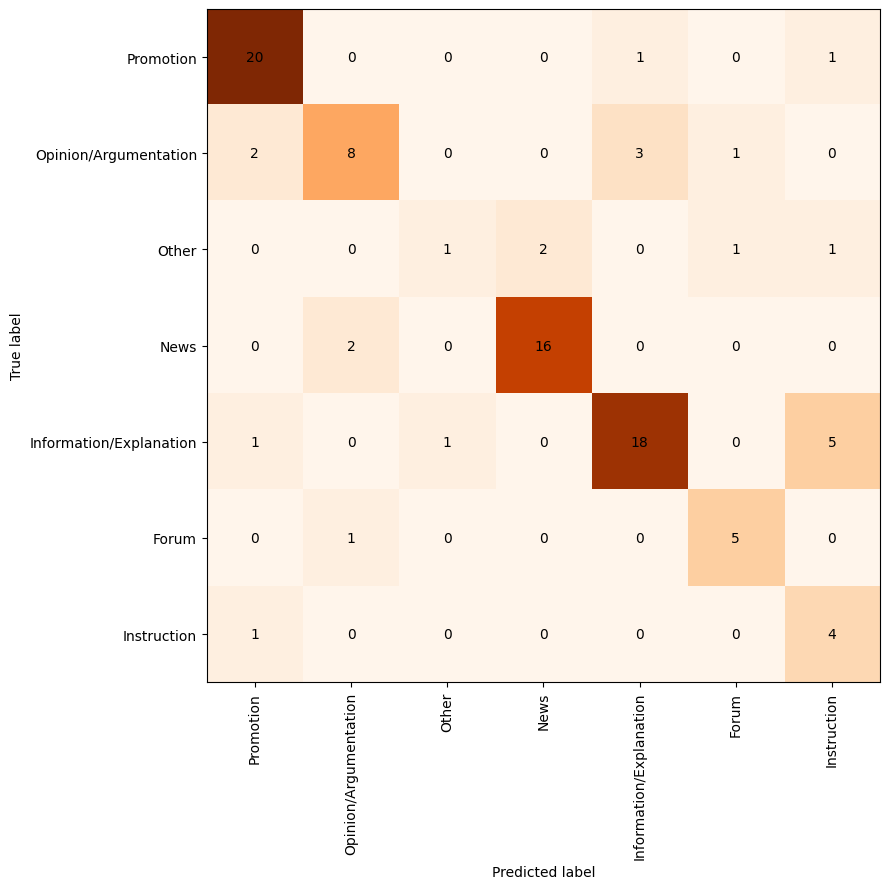

error when calculating classification report
MT-GINCO
Macro f1: 0.572, Micro f1: 0.62
Accuracy: 0.62


<Figure size 640x480 with 0 Axes>

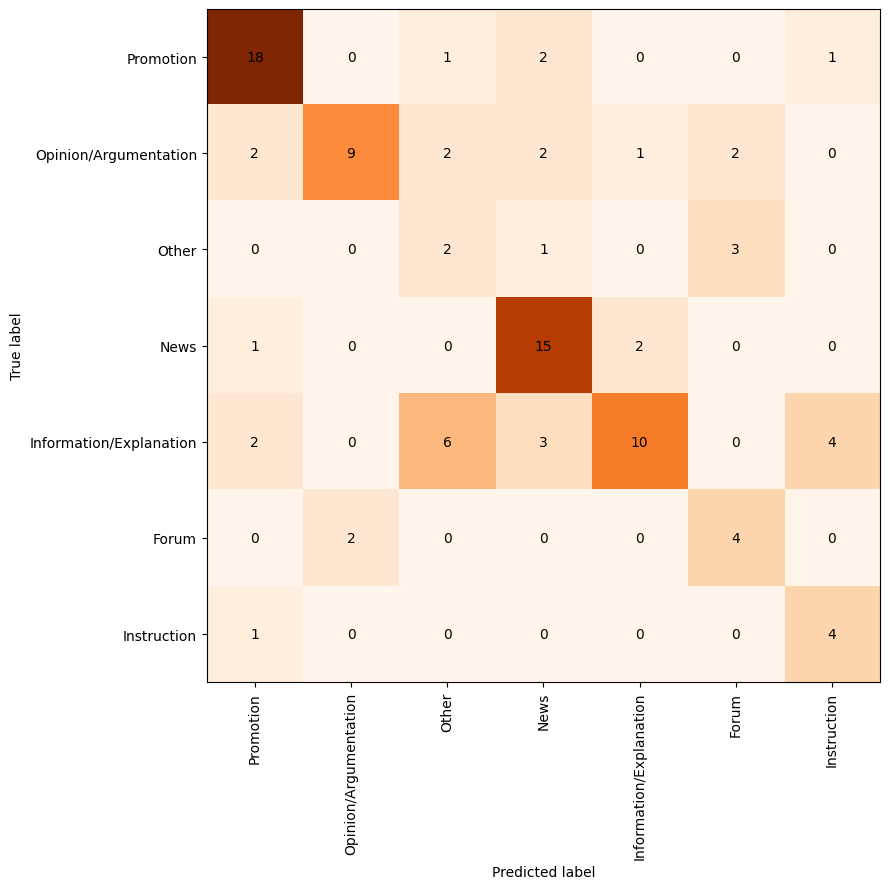

                         precision    recall  f1-score   support

              Promotion       0.44      0.67      0.53         6
  Opinion/Argumentation       0.77      0.40      0.53        25
                  Other       0.44      0.80      0.57         5
                   News       0.65      0.83      0.73        18
Information/Explanation       0.82      0.50      0.62        18
                  Forum       0.18      0.33      0.24         6
            Instruction       0.75      0.82      0.78        22

               accuracy                           0.62       100
              macro avg       0.58      0.62      0.57       100
           weighted avg       0.68      0.62      0.62       100

SI-GINCO
Macro f1: 0.576, Micro f1: 0.62
Accuracy: 0.62


<Figure size 640x480 with 0 Axes>

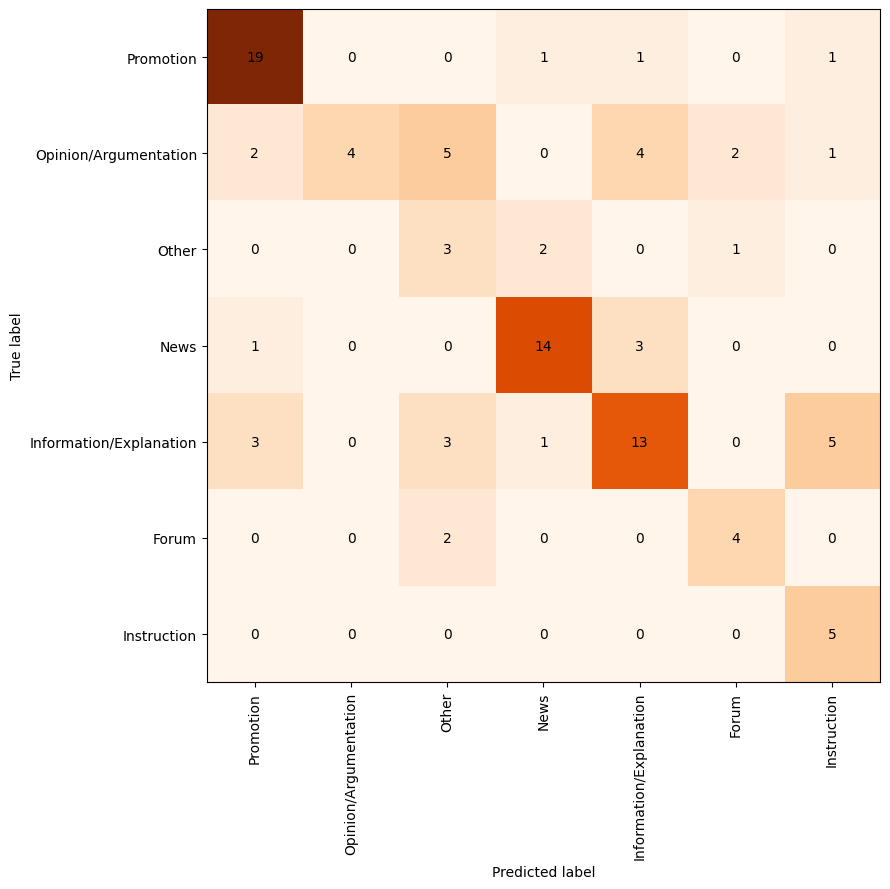

                         precision    recall  f1-score   support

              Promotion       0.57      0.67      0.62         6
  Opinion/Argumentation       0.62      0.52      0.57        25
                  Other       0.42      1.00      0.59         5
                   News       0.78      0.78      0.78        18
Information/Explanation       1.00      0.22      0.36        18
                  Forum       0.23      0.50      0.32         6
            Instruction       0.76      0.86      0.81        22

               accuracy                           0.62       100
              macro avg       0.63      0.65      0.58       100
           weighted avg       0.71      0.62      0.61       100

CORE
Macro f1: 0.427, Micro f1: 0.52
Accuracy: 0.52


<Figure size 640x480 with 0 Axes>

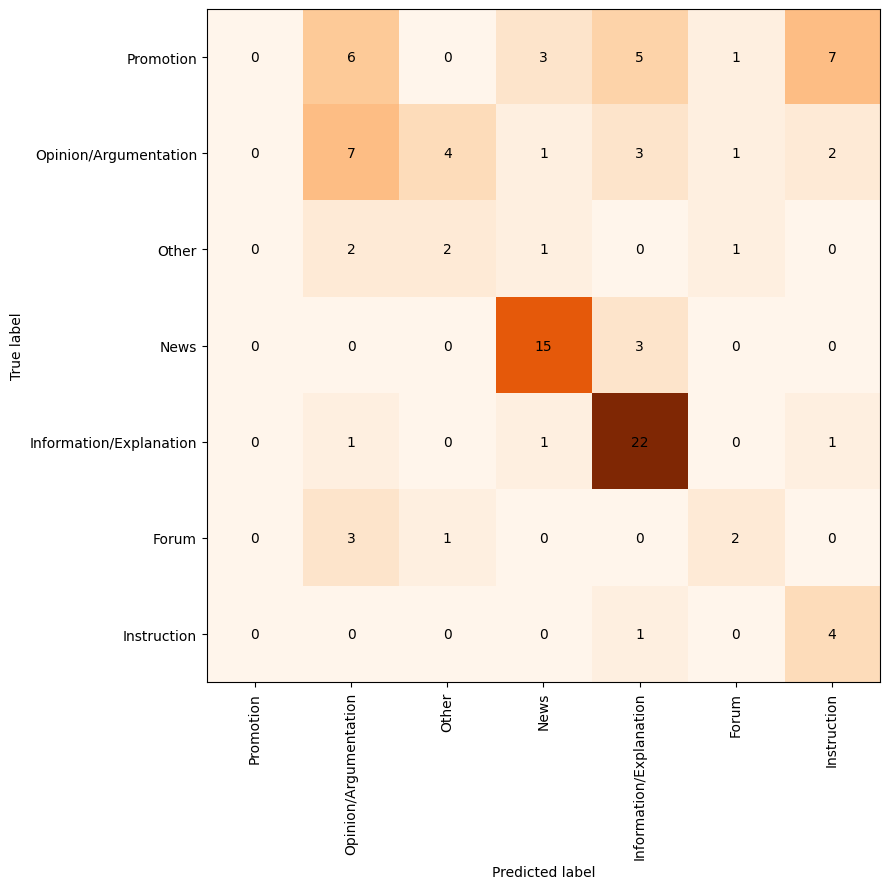

                         precision    recall  f1-score   support

              Promotion       0.40      0.33      0.36         6
  Opinion/Argumentation       0.65      0.88      0.75        25
                  Other       0.29      0.80      0.42         5
                   News       0.71      0.83      0.77        18
Information/Explanation       0.37      0.39      0.38        18
                  Forum       0.29      0.33      0.31         6
            Instruction       0.00      0.00      0.00        22

               accuracy                           0.52       100
              macro avg       0.39      0.51      0.43       100
           weighted avg       0.41      0.52      0.45       100

X-GENRE
Macro f1: 0.613, Micro f1: 0.67
Accuracy: 0.67


/home/tajak/Genre-Datasets-Comparison/genre_comparison/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/Genre-Datasets-Comparison/genre_comparison/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/tajak/Genre-Datasets-Comparison/genre_comparison/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

<Figure size 640x480 with 0 Axes>

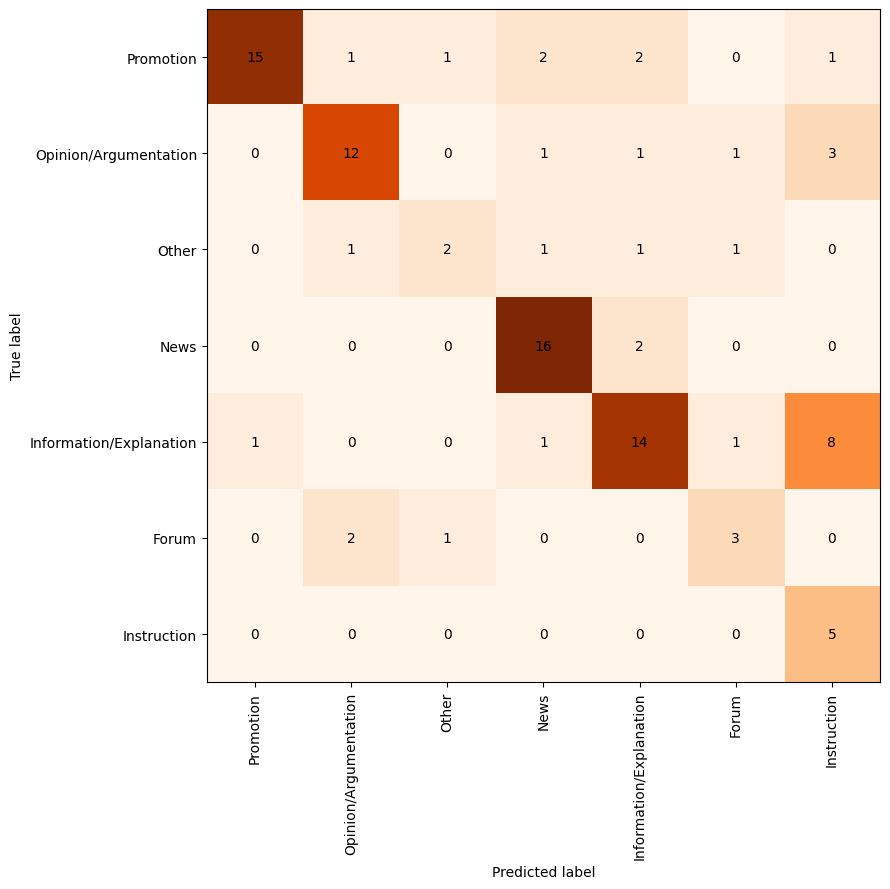

                         precision    recall  f1-score   support

              Promotion       0.50      0.50      0.50         6
  Opinion/Argumentation       0.70      0.56      0.62        25
                  Other       0.29      1.00      0.45         5
                   News       0.76      0.89      0.82        18
Information/Explanation       0.75      0.67      0.71        18
                  Forum       0.50      0.33      0.40         6
            Instruction       0.94      0.68      0.79        22

               accuracy                           0.67       100
              macro avg       0.63      0.66      0.61       100
           weighted avg       0.73      0.67      0.68       100

FTD
Macro f1: 0.449, Micro f1: 0.613
Accuracy: 0.61


<Figure size 640x480 with 0 Axes>

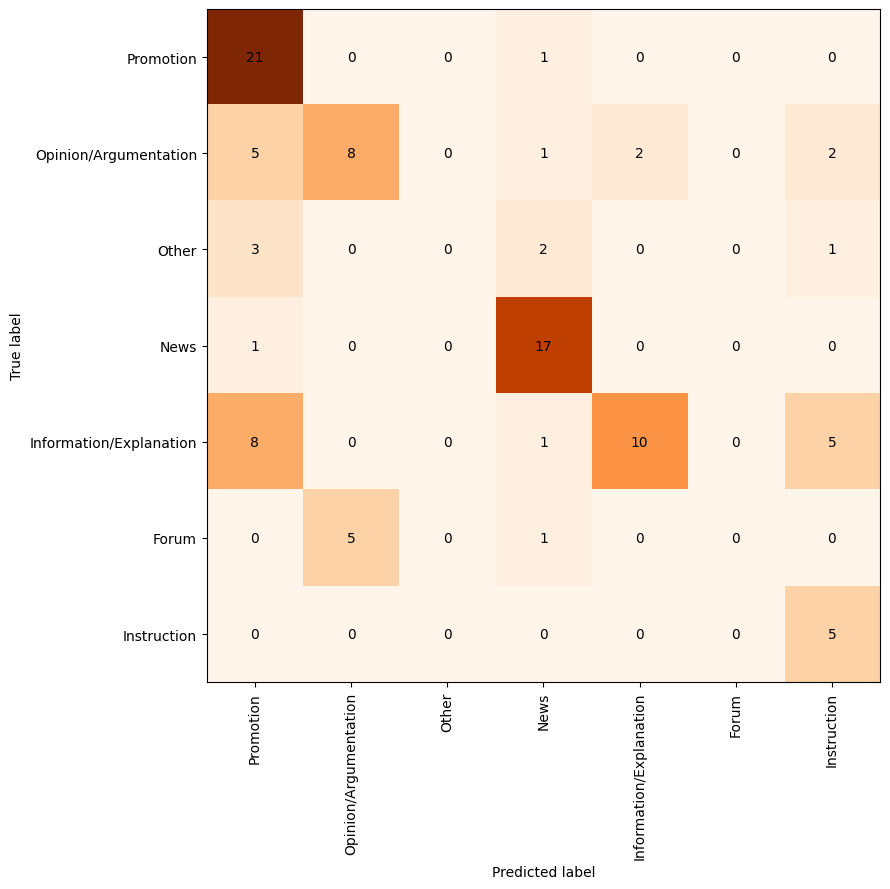

error when calculating classification report


<Figure size 640x480 with 0 Axes>

In [16]:
column_list = []
micro_f1_list = []
macro_f1_list = []
accuracy_list = []

for column in ['Chat-GPT', 'MT-GINCO', 'SI-GINCO', 'CORE', 'X-GENRE', 'FTD']:
	print(column)
	current_results = testing(comparison, column)
	column_list.append(column)
	micro_f1_list.append(current_results["micro F1"])
	macro_f1_list.append(current_results["macro F1"])
	accuracy_list.append(current_results["accuracy"])

In [17]:
results_df = pd.DataFrame({"model": column_list, "Micro F1": [round(x,2) for x in micro_f1_list], "Macro F1": [round(x,2) for x in macro_f1_list], "Accuracy": [round(x,2) for x in accuracy_list]})

print(results_df.sort_values(by="Micro F1", ascending= False).to_markdown())

|    | model    |   Micro F1 |   Macro F1 |   Accuracy |
|---:|:---------|-----------:|-----------:|-----------:|
|  0 | Chat-GPT |       0.74 |       0.66 |       0.72 |
|  4 | X-GENRE  |       0.67 |       0.61 |       0.67 |
|  1 | MT-GINCO |       0.62 |       0.57 |       0.62 |
|  2 | SI-GINCO |       0.62 |       0.58 |       0.62 |
|  5 | FTD      |       0.61 |       0.45 |       0.61 |
|  3 | CORE     |       0.52 |       0.43 |       0.52 |


In [16]:
comparison.head(1)

,text,labels,Chat-GPT,explanation,"Label, persuaded by explanation",match,match after explanation,y_true,MT-GINCO,SI-GINCO,CORE,X-GENRE,FTD
0,Welcome to KBismarck.org! This is a community ...,Information/Explanation,Promotion,"The text is promoting a community website, KBi...",Promotion,False,True,Information/Explanation,Other,Other,Forum,Forum,Promotion


In [17]:
comparison.columns

Index(['text', 'labels', 'Chat-GPT', 'explanation',
       'Label, persuaded by explanation', 'match', 'match after explanation',
       'y_true', 'MT-GINCO', 'SI-GINCO', 'CORE', 'X-GENRE', 'FTD'],
      dtype='object')

### Compare differences between ChatGPT and X-GENRE

In [18]:
# Add information in columns where X-GENRE predictions are (in)correct and where Chat-GPT predictions are (in)correct
comparison["X-GENRE-correctness"] = np.where((comparison["labels"] == comparison["X-GENRE"]), "correct", "incorrect")
comparison["ChatGPT-correctness"] = np.where((comparison["labels"] == comparison["Chat-GPT"]), "correct", "incorrect")

comparison.head(2)

,text,labels,Chat-GPT,explanation,"Label, persuaded by explanation",match,match after explanation,y_true,MT-GINCO,SI-GINCO,CORE,X-GENRE,FTD,X-GENRE-correctness,ChatGPT-correctness
60,Project Gutenberg <p> Project Gutenberg is a l...,Promotion,Promotion,This text aims to promote various websites tha...,Promotion,True,True,Promotion,Promotion,Information/Explanation,Information/Explanation,Information/Explanation,Promotion,incorrect,correct
109,I have a lot of YouTube videos and they genera...,Opinion/Argumentation,Opinion/Argumentation,The text is an opinion piece by a musician res...,Opinion/Argumentation,True,NaN,Opinion/Argumentation,Forum,Forum,Other,Opinion/Argumentation,Opinion/Argumentation,correct,correct


Text(50.722222222222214, 0.5, 'ChatGPT')

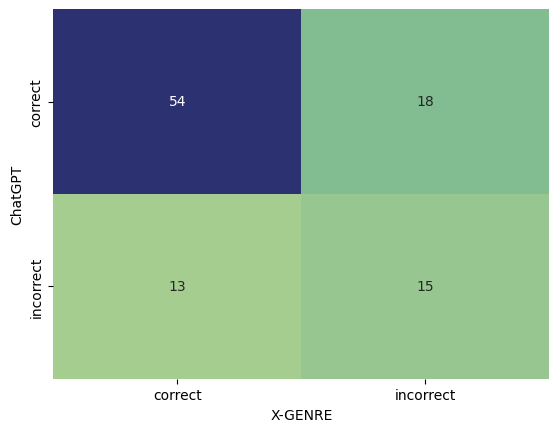

In [21]:
# Analyse in how the models' result cooccur
import seaborn as sns
import matplotlib.pyplot as plt

result_crosstab = pd.crosstab(comparison["ChatGPT-correctness"], comparison["X-GENRE-correctness"])
sns.heatmap(result_crosstab, annot=True, cbar=False, cmap="crest")

plt.xlabel("X-GENRE")
plt.ylabel("ChatGPT")

Text(50.722222222222214, 0.5, 'ChatGPT')

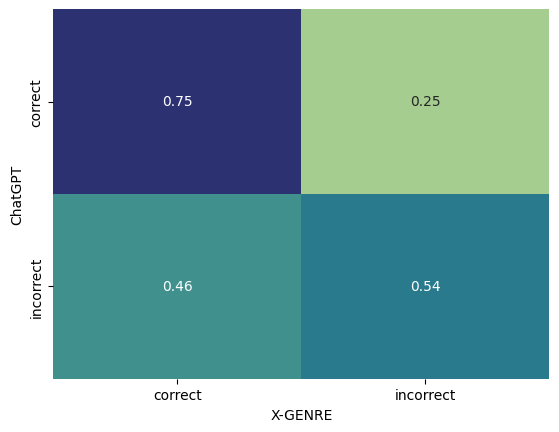

In [23]:
# Analyse in how the models' result cooccur
import seaborn as sns
import matplotlib.pyplot as plt

result_crosstab = pd.crosstab(comparison["ChatGPT-correctness"], comparison["X-GENRE-correctness"], normalize="index")
sns.heatmap(result_crosstab, annot=True, cbar=False, cmap="crest")

plt.xlabel("X-GENRE")
plt.ylabel("ChatGPT")

Text(50.722222222222214, 0.5, 'ChatGPT')

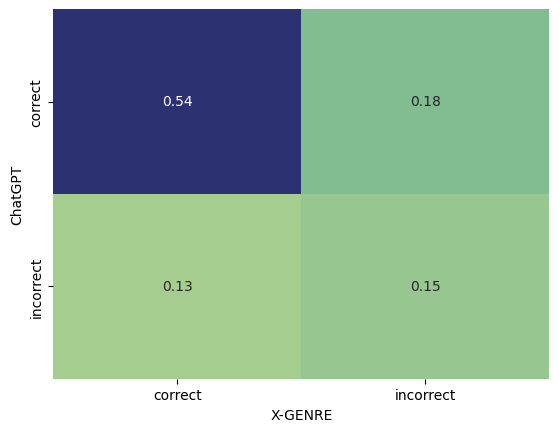

In [24]:
# Analyse in how the models' result cooccur
import seaborn as sns
import matplotlib.pyplot as plt

result_crosstab = pd.crosstab(comparison["ChatGPT-correctness"], comparison["X-GENRE-correctness"], normalize="all")
sns.heatmap(result_crosstab, annot=True, cbar=False, cmap="crest")

plt.xlabel("X-GENRE")
plt.ylabel("ChatGPT")

In [25]:
# Analyse in which genres the models match and in which they don't
comparison["models_match"] = np.where((comparison["ChatGPT-correctness"] == comparison["X-GENRE-correctness"]), "match", "mismatch")
comparison.head(1)

,text,labels,Chat-GPT,explanation,"Label, persuaded by explanation",match,match after explanation,y_true,MT-GINCO,SI-GINCO,CORE,X-GENRE,FTD,X-GENRE-correctness,ChatGPT-correctness,models_match
60,Project Gutenberg <p> Project Gutenberg is a l...,Promotion,Promotion,This text aims to promote various websites tha...,Promotion,True,True,Promotion,Promotion,Information/Explanation,Information/Explanation,Information/Explanation,Promotion,incorrect,correct,mismatch


In [26]:
pd.crosstab(comparison["labels"], comparison["models_match"], normalize="index")

models_match,match,mismatch
labels,,
Forum,0.666667,0.333333
Information/Explanation,0.600000,0.400000
Instruction,0.800000,0.200000
News,0.777778,0.222222
Opinion/Argumentation,0.666667,0.333333
Other,0.833333,0.166667
Promotion,0.681818,0.318182


In [27]:
# Analyze genres where ChatGPT is incorrect, but X-GENRE is correct
comparison[(comparison["ChatGPT-correctness"] == "incorrect") & (comparison["X-GENRE-correctness"] == "correct")].labels.value_counts(normalize=True)

Opinion/Argumentation      0.384615
Information/Explanation    0.230769
News                       0.153846
Promotion                  0.076923
Other                      0.076923
Instruction                0.076923
Name: labels, dtype: float64

In [28]:
# Analyze where ChatGPT is correct, but X-GENRE is incorrect
comparison[(comparison["ChatGPT-correctness"] == "correct") & (comparison["X-GENRE-correctness"] == "incorrect")].labels.value_counts(normalize="True")

Information/Explanation    0.388889
Promotion                  0.333333
Forum                      0.111111
News                       0.111111
Opinion/Argumentation      0.055556
Name: labels, dtype: float64

In [25]:
pd.crosstab(comparison["labels"], comparison["models_match"])

models_match,match,mismatch
labels,,
Forum,4,2
Information/Explanation,16,10
Instruction,4,1
News,15,4
Opinion/Argumentation,12,6
Other,5,1
Promotion,17,7


### Calculate metrics taking into account ChatGPT explanations

Macro f1: 0.854, Micro f1: 0.887
Accuracy: 0.865


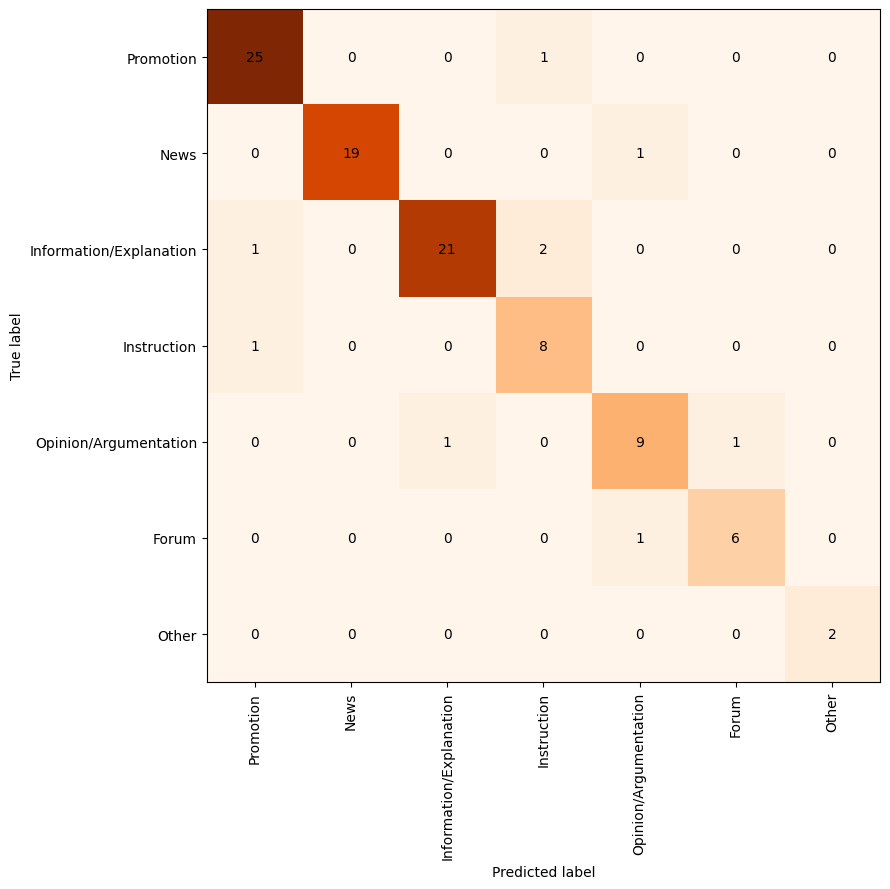

error when calculating classification report


<Figure size 640x480 with 0 Axes>

In [19]:
# Analyse also results if we take into account the Chat-GPT's explanation and allow a possibility of persuading us

# Get the true labels
y_true = comparison['Label, persuaded by explanation'].to_list()

y_pred = comparison["Chat-GPT"].to_list()

LABELS = list(comparison['Label, persuaded by explanation'].unique())

# Calculate the scores
macro = f1_score(y_true, y_pred, labels=LABELS, average="macro")
micro = f1_score(y_true, y_pred, labels=LABELS,  average="micro")
print(f"Macro f1: {macro:0.3}, Micro f1: {micro:0.3}")
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:0.3}")

# Plot the confusion matrix:
cm = confusion_matrix(y_true, y_pred, labels=LABELS)
plt.figure(figsize=(9, 9))
plt.imshow(cm, cmap="Oranges")
for (i, j), z in np.ndenumerate(cm):
	plt.text(j, i, '{:d}'.format(z), ha='center', va='center')
classNames = LABELS
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)

plt.tight_layout()
fig1 = plt.gcf()
plt.show()
plt.draw()

try:
	print(classification_report(y_true, y_pred, target_names=LABELS))
except:
	print("error when calculating classification report")

#add_result_comparison = pd.DataFrame({"accuracy": [accuracy], "micro F1":[micro], "macro F1": [macro]})